In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# if getting error, please mute the three lines below
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'text.usetex': True}) # import to make plots nicer
%config InlineBackend.figure_format = 'svg' # import to make plots nicer
from scipy.integrate import solve_ivp

# Set global font size for title, x-label, and y-label
plt.rcParams['axes.titlesize'] = 20

plt.rcParams['axes.labelsize'] = 16


# Set global font size for x and y tick labels
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Set global font size for the legend
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.figsize'] =  (8, 6)

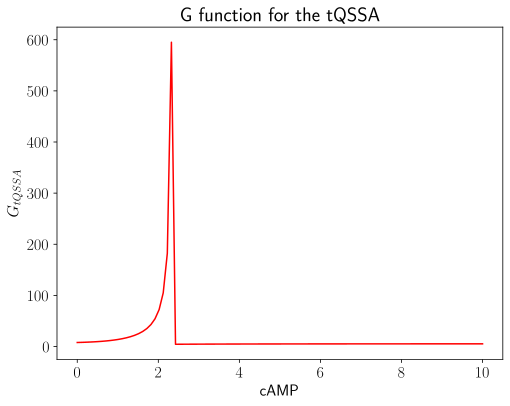

In [2]:
def g(cAMP):
    numerator1 = cAMP * r1 * (-0.5 * Km2 + 0.5 * W0) + (-0.5 * cAMP * r1 - 0.5 * cAMP * r2 - 0.5 * Km1 * r2 - 0.5 * r2 * W0) * Dt

    denominator1 = cAMP * r1 - 1. * r2 * Dt

    denominator1 = np.where(denominator1 == 0, Km2 / (Km2 + Km1), denominator1)

    numerator2 = cAMP ** 2 * r1 ** 2 * (Km2 ** 2 + 2. * Km2 * W0 + W0 ** 2) + cAMP * r1 * (cAMP * (2. * Km2 * r1 + 2. * Km2 * r2 + 2. * r1 * W0 - 2. * r2 * W0) + r2 * (2. * Km1 * Km2 - 2. * Km1 * W0 - 2. * Km2 * W0 - 2. * W0 ** 2)) * Dt + (cAMP ** 2 * (r1 ** 2 + 2. * r1 * r2 + r2 ** 2) + cAMP * r2 * (2. * Km1 * r1 + 2. * Km1 * r2 - 2. * r1 * W0 + 2. * r2 * W0) + r2 ** 2 * (Km1 ** 2 + 2. * Km1 * W0 + W0 ** 2)) * Dt ** 2
    denominator2 = (cAMP * r1 - 1. * r2 * Dt) ** 2

    return numerator1 / denominator1 + 0.5 * np.sqrt(numerator2 / denominator2)



k = 6
W0 = 6.57
W1 = 10
k1 = 1.09 / k
k3 = 3.5 / k
k2 = 5.25 / k

r1, r2, r3, r4 = 2.13 / k, 1.62 / k, 0.56 / k, 0.94 / k
Km1, Km2, Km3, Km4 = 1.401430143014302, 5, 5.1, 4.3
Dt = 3.116001600160016
Et = 1.5

x = np.linspace(0, 10, 100)

plt.plot(x, g(x), color='red')
plt.title(r'G function for the tQSSA')
plt.xlabel('cAMP')
plt.ylabel(r'$G_{tQSSA}$')
plt.savefig('G_tQSSA_positive.png', dpi=300)
plt.show()
